                      Null Count
Feature                         
quality                        0
alcohol                        0
sulphates                      0
pH                             0
density                        0
total sulfur dioxide           0
free sulfur dioxide            0
chlorides                      0
residual sugar                 0
citric acid                    0
volatile acidity               0
fixed acidity                  0


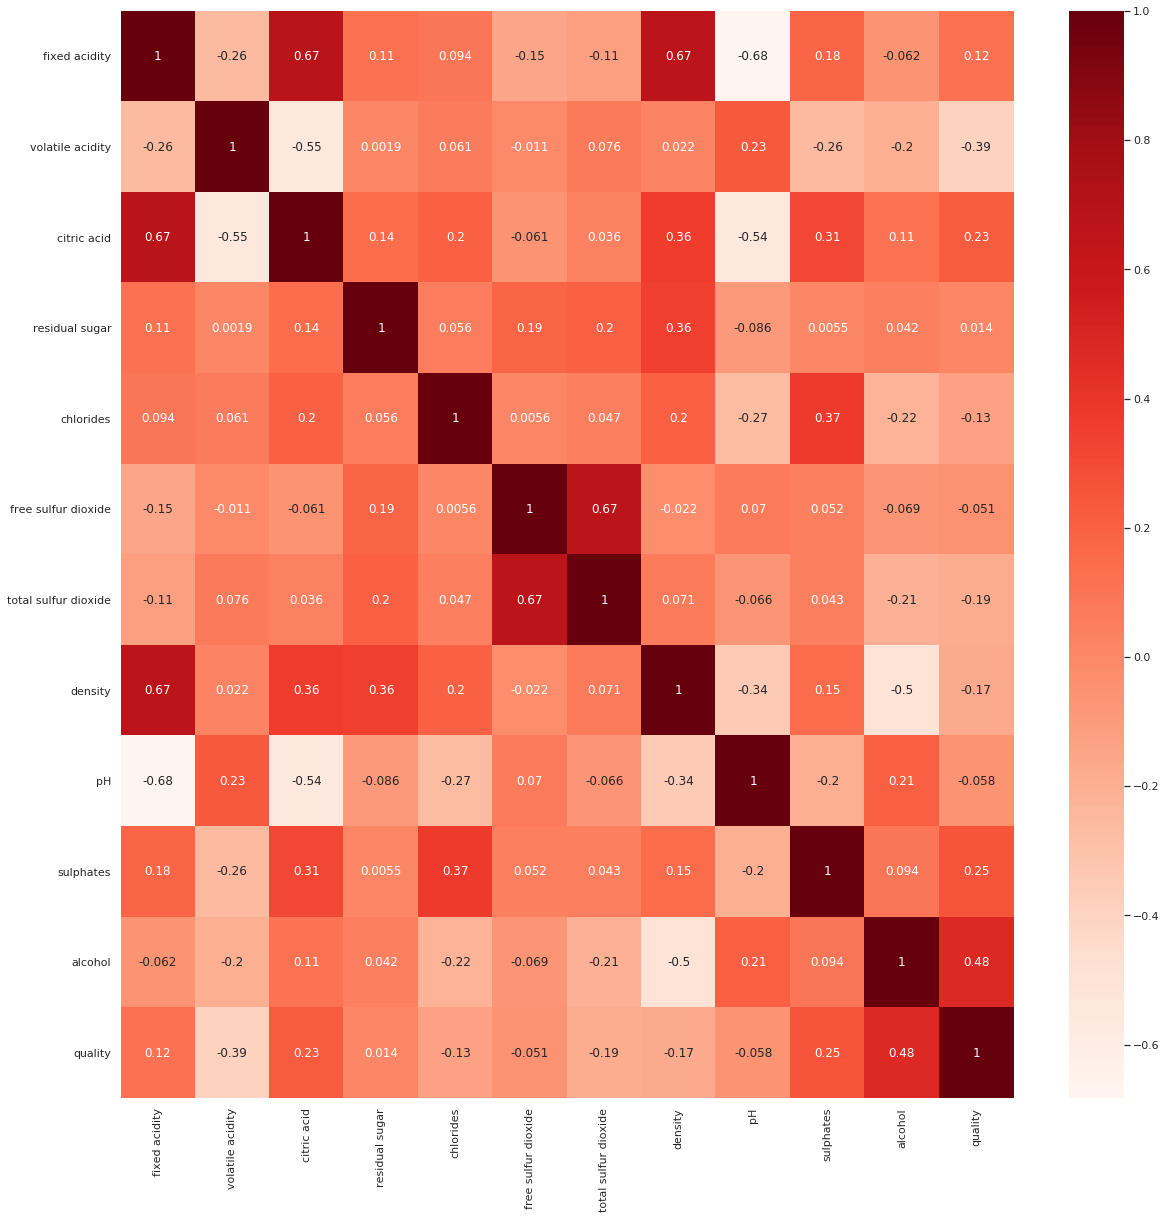

quality          1.000000
alcohol          0.476166
sulphates        0.251397
citric acid      0.226373
fixed acidity    0.124052
Name: quality, dtype: float64 

(1599, 3)
R^2 is: 
 0.3132121041700513
RMSE is: 
 0.4488199140726986


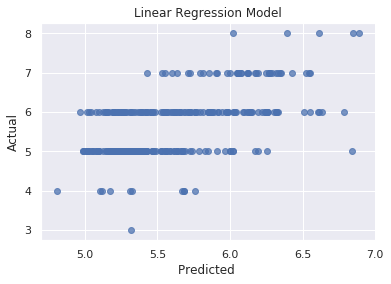

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns; sns.set(color_codes=True)

train = pd.read_csv('/content/winequality-red.csv')


## ---Null values---##
nulls = pd.DataFrame(train.isnull().sum().sort_values(ascending=False)[:25])
nulls.columns = ['Null Count']
nulls.index.name = 'Feature'
print(nulls)

## Replacing null values with mean values
data = train.select_dtypes(include=[np.number]).interpolate().dropna()


#Using Pearson Correlation and ploting in the heat map
plt.figure(figsize=(20,20))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

# Printing the correlation with the target feature "quality"
print(cor['quality'].sort_values(ascending=False)[:5],'\n')

##Build a multiple linear regression model
y = data['quality']
X = data[['alcohol', 'sulphates', 'citric acid']]

print(X.shape)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
                                    X, y, random_state=42, test_size=.20)
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(X_train, y_train)
##Evaluate the performance and visualize results
print ("R^2 is: \n", model.score(X_test, y_test))
predictions = model.predict(X_test)
from sklearn.metrics import mean_squared_error
print ('RMSE is: \n', mean_squared_error(y_test, predictions))

##visualize

actual_values = y_test
plt.scatter(predictions, actual_values, alpha=.75,
            color='b') #alpha helps to show overlapping data
plt.xlabel('Predicted ')
plt.ylabel('Actual')
plt.title('Linear Regression Model')
plt.show()

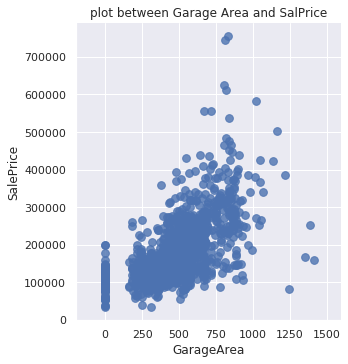

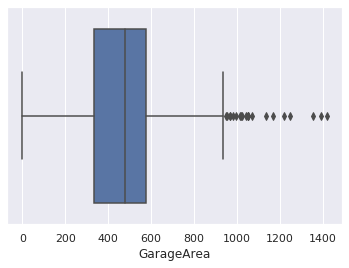

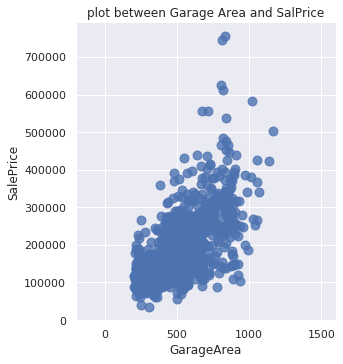

(array([  58,  178,  178,  185,  349,  389,  440,  473,  496,  527,  581,
        591,  664,  664,  691,  769,  798,  803,  825,  898, 1046, 1061,
       1142, 1169, 1182, 1190, 1243, 1298, 1373]), array([1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 1]))
(1460, 2)
(1433, 2)


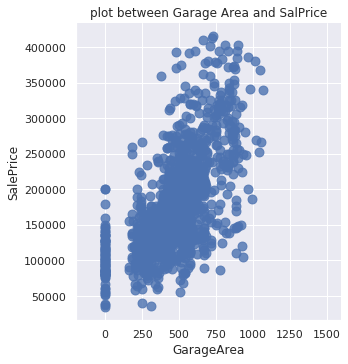

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns; sns.set(color_codes=True)
import matplotlib.pyplot as plt
from scipy import stats

df = pd.read_csv('train.csv', sep=',', usecols=['GarageArea', 'SalePrice'])

# Create scatterplot of dataframe before removing Anamolies
sns.lmplot('GarageArea', # Horizontal axis
           'SalePrice', # Vertical axis
           data=df, # Data source
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "o", # Set marker style
                        "s": 60}) # S marker size

# Set title
plt.title('plot between Garage Area and SalPrice')
plt.xlim(-200,1600)
# Set x-axis label
plt.xlabel('GarageArea')
# Set y-axis label
plt.ylabel('SalePrice')
plt.show()

# Using box plot to identifty the outliers
sns.boxplot(x=df['GarageArea'])

# Removing the Anamolies by directly specifying the limits of the outliers(anamolies are points which are far from group of samples)

train = df
train['GarageArea'] = train[train['GarageArea']>200]
train['GarageArea'] = train[train['GarageArea']<1200]


# Create Scatterplot of the dataframe after removing the anamolies in the data
sns.lmplot('GarageArea', # Horizontal axis
           'SalePrice', # Vertical axis
           data=train, # Data source
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "o", # Set marker style
                        "s": 80}) # S marker size

# Set title
plt.title('plot between Garage Area and SalPrice')
plt.xlim(-200, 1600)
# Set x-axis label
plt.xlabel('GarageArea')
# Set y-axis label
plt.ylabel('SalePrice')
plt.show()


# Removing the Anamolies using z-score(68% and with in 95%)
# if the data is more than 3 standard deviations away then it is considered as outlier
# if the data is less than -3 standard deviations away then it is considered as outlier
df = pd.read_csv('train.csv', sep=',',usecols=(62,80))
z = np.abs(stats.zscore(df))
threshold = 3
print(np.where(z > 3))
modified_df = df[(z < 3).all(axis=1)]
print(df.shape) #dimensions represents shape
print(modified_df.shape)

# Create Scatterplot of the dataframe after removing the anamolies in the data
sns.lmplot('GarageArea', # Horizontal axis
           'SalePrice', # Vertical axis
           data=modified_df, # Data source
           fit_reg=False, # Don't fix a regression line
           scatter_kws={"marker": "o", # Set marker style
                        "s": 80}) # S marker size

# Set title
plt.title('plot between Garage Area and SalPrice')
plt.xlim(-200, 1600)
# Set x-axis label
plt.xlabel('GarageArea')
# Set y-axis label
plt.ylabel('SalePrice')
plt.show()


# Removing the anamolies using Quantile - removing less than 25% and more than 75% Qunatile
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#print(IQR)
#print((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR)))

#modified_df = df[~((df < (Q1 - 1.5 * IQR)) |(df > (Q3 + 1.5 * IQR))).any(axis=1)]
#print(modified_df.shape)

# Create Scatterplot of the dataframe after removing the anamolies in the data
#sns.lmplot('GarageArea', # Horizontal axis
  #         'SalePrice', # Vertical axis
 #          data=modified_df, # Data source
   #        fit_reg=False, # Don't fix a regression line
    #       scatter_kws={"marker": "o", # Set marker style
     #                   "s": 80}) # S marker size

# Set title
#plt.title('plot between Garage Area and SalPrice')
#plt.xlim(-200, 1600)
# Set x-axis label
#plt.xlabel('GarageArea')
# Set y-axis label
#plt.ylabel('SalePrice')
#plt.show()